In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import warnings

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Credit Card Defaulter Prediction.csv")

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [6]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y
29999,30000,50000,M,University,Married,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,Y


In [7]:
df.shape

(30000, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [10]:
df = df.drop('ID',axis = 1)

In [11]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [12]:
df.duplicated().sum()

35

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.rename({'default ':'default'},axis = 1)

In [16]:
cat_var = []
for i in df.columns:
  if df[i].dtypes == 'O':
    cat_var.append(i)
cat_var

['SEX', 'EDUCATION', 'MARRIAGE', 'default']

In [17]:
for j in cat_var:
  print('Column:- ',j)
  print(df[j].value_counts())
  print('')

Column:-  SEX
F    18091
M    11874
Name: SEX, dtype: int64

Column:-  EDUCATION
University         14019
Graduate school    10563
High School         4915
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

Column:-  MARRIAGE
Single     15945
Married    13643
Other        323
0             54
Name: MARRIAGE, dtype: int64

Column:-  default
N    23335
Y     6630
Name: default, dtype: int64



In [18]:
df['EDUCATION'] = df['EDUCATION'].replace('0','Unknown')

In [19]:
df['EDUCATION'].value_counts()

University         14019
Graduate school    10563
High School         4915
Unknown              345
Others               123
Name: EDUCATION, dtype: int64

In [20]:
df['MARRIAGE'] = df['MARRIAGE'].replace("0",'Other')

In [21]:
df['MARRIAGE'].value_counts()

Single     15945
Married    13643
Other        377
Name: MARRIAGE, dtype: int64

<Axes: xlabel='default', ylabel='count'>

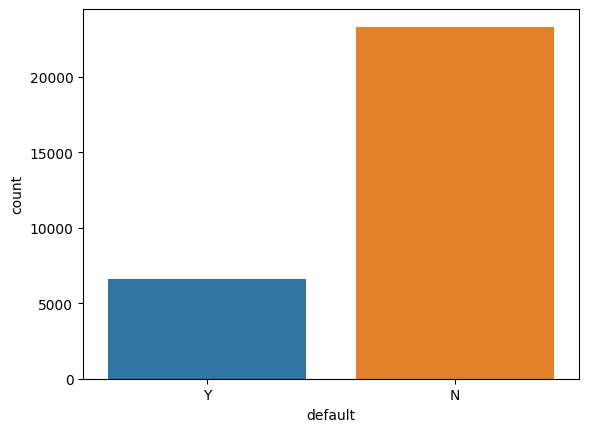

In [22]:
sb.countplot(x = 'default',data = df)

<Axes: xlabel='MARRIAGE', ylabel='count'>

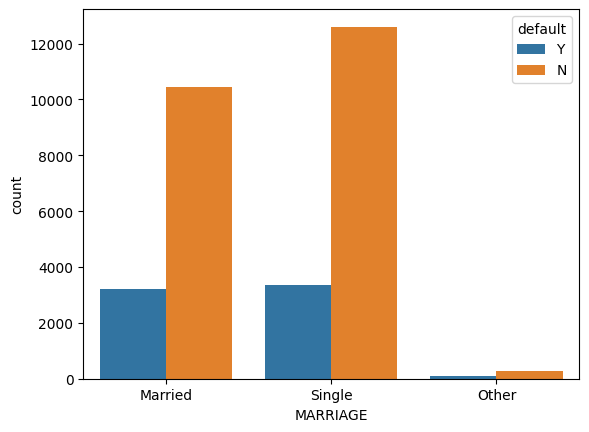

In [23]:
sb.countplot(x = 'MARRIAGE',data = df,hue = 'default')

<Axes: xlabel='EDUCATION', ylabel='count'>

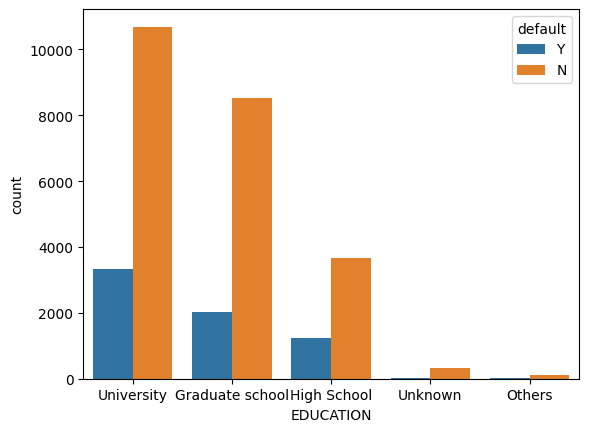

In [24]:
sb.countplot(x = 'EDUCATION',data = df,hue = 'default')

In [25]:
num_var = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float':
        num_var.append(i)

In [26]:
num_var

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

Column :-  LIMIT_BAL


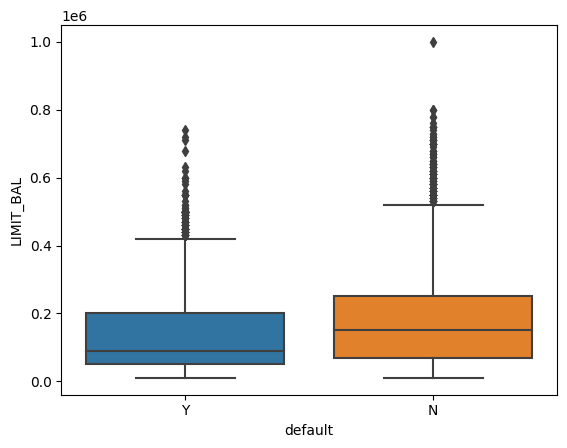


Column :-  AGE


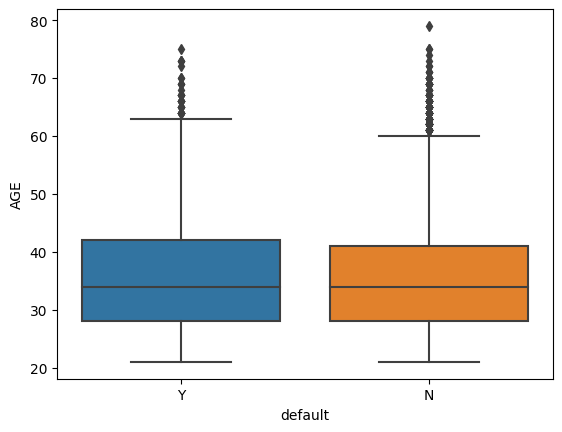


Column :-  PAY_0


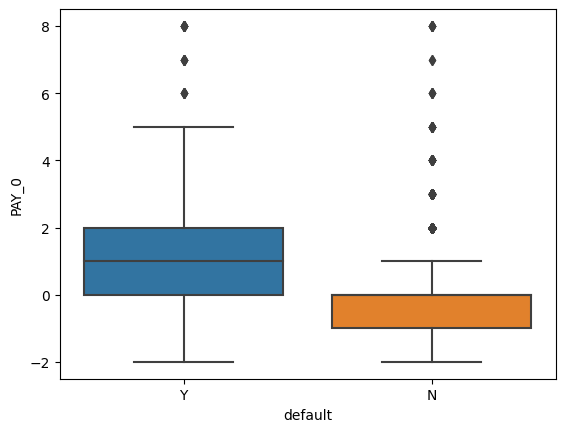


Column :-  PAY_2


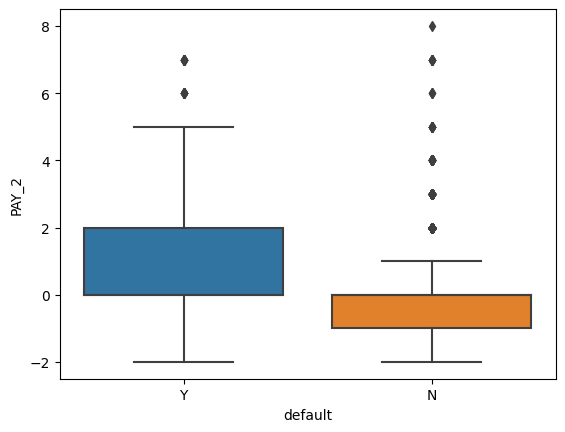


Column :-  PAY_3


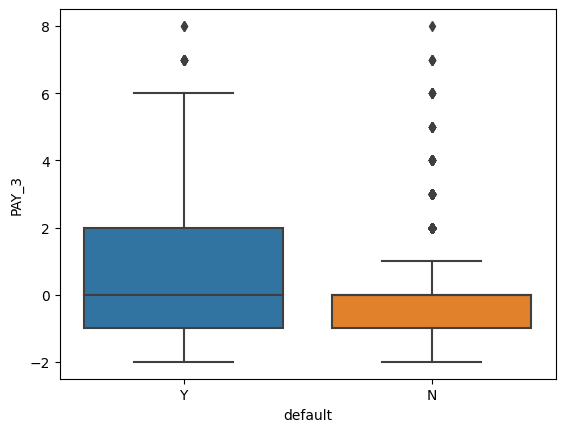


Column :-  PAY_4


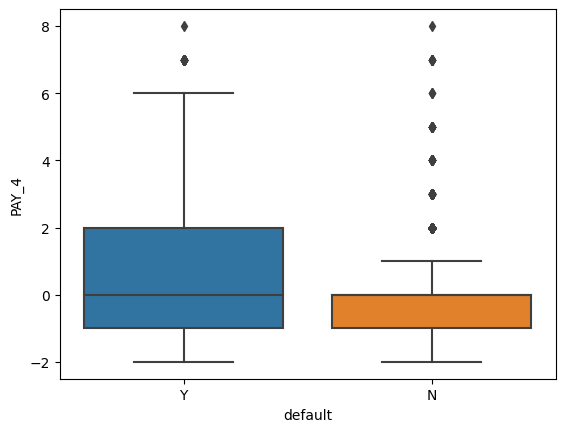


Column :-  PAY_5


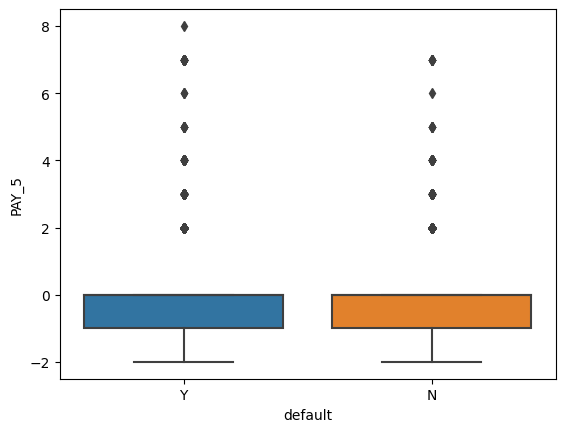


Column :-  PAY_6


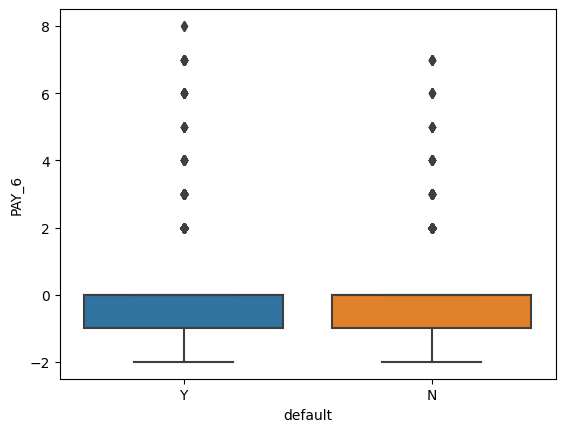


Column :-  BILL_AMT1


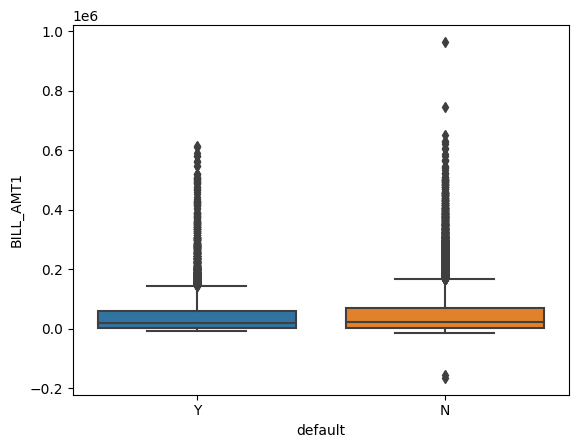


Column :-  BILL_AMT2


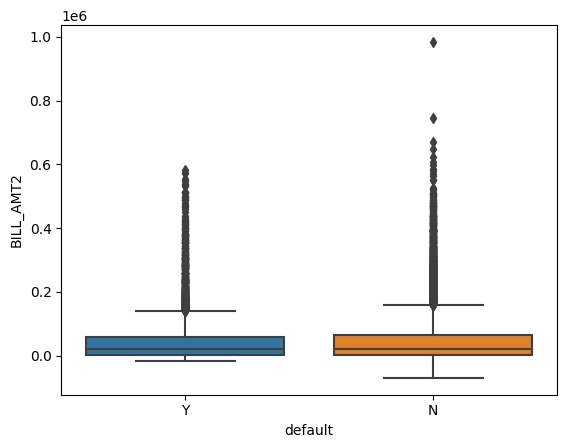


Column :-  BILL_AMT3


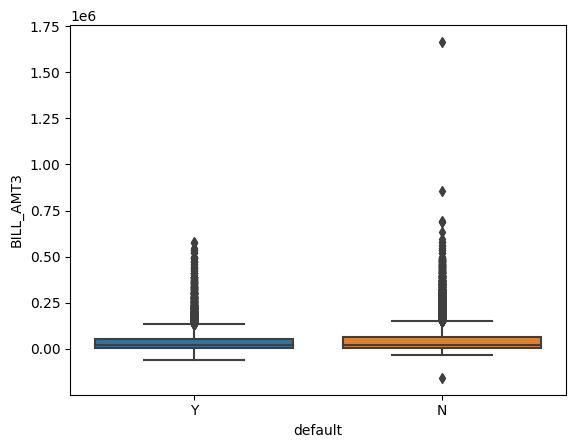


Column :-  BILL_AMT4


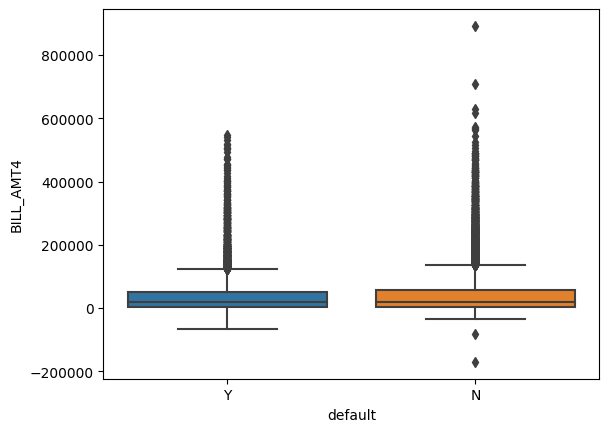


Column :-  BILL_AMT5


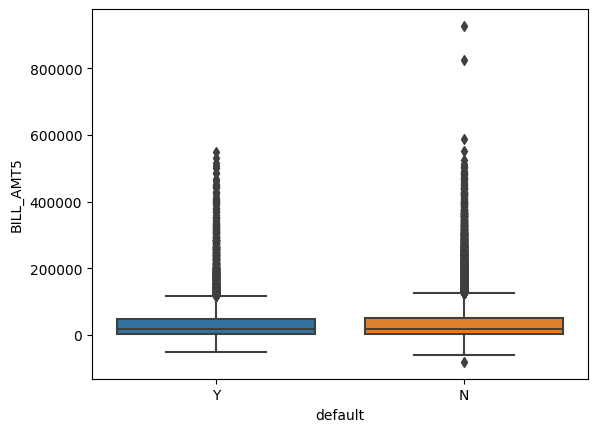


Column :-  BILL_AMT6


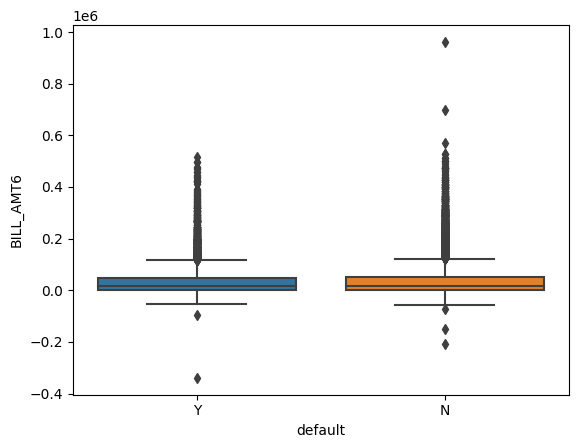


Column :-  PAY_AMT1


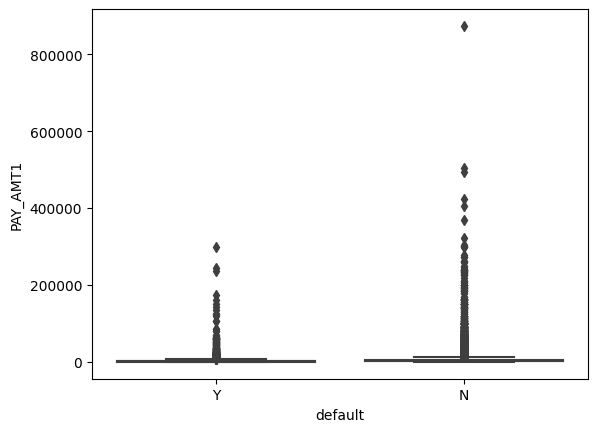


Column :-  PAY_AMT2


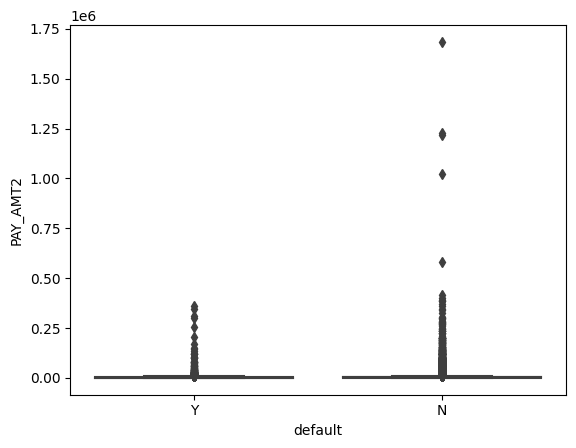


Column :-  PAY_AMT3


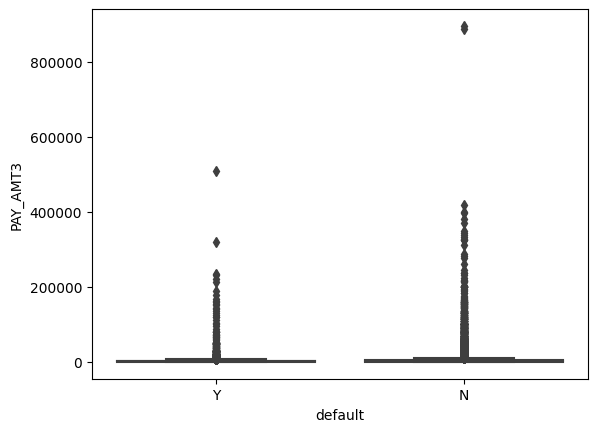


Column :-  PAY_AMT4


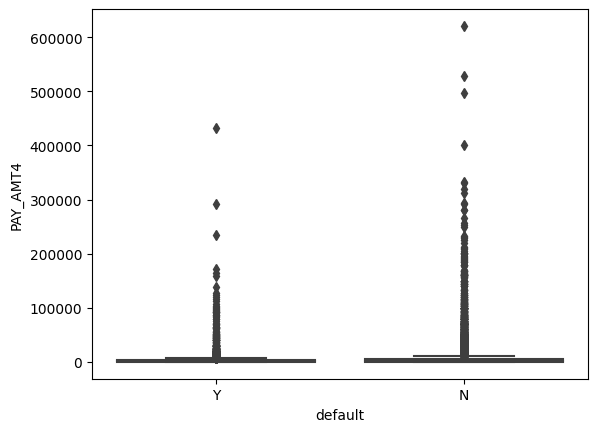


Column :-  PAY_AMT5


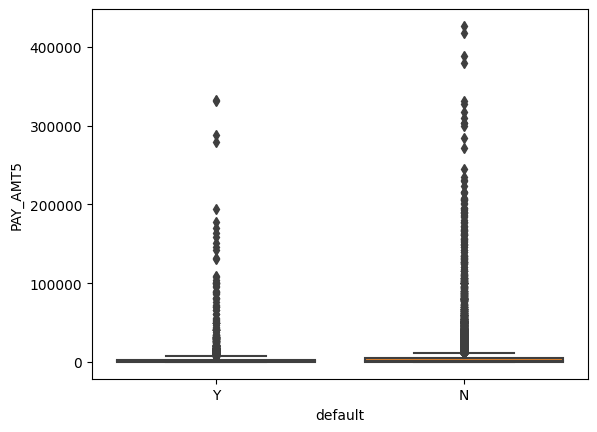


Column :-  PAY_AMT6


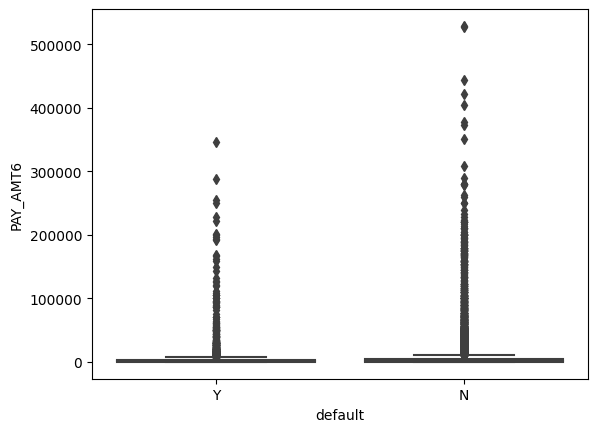

In [27]:
for j in num_var:
    print('Column :- ',j)
    sb.boxplot(y = j,x = 'default',data = df)
    mpl.show()
    print('')

Column :-  LIMIT_BAL


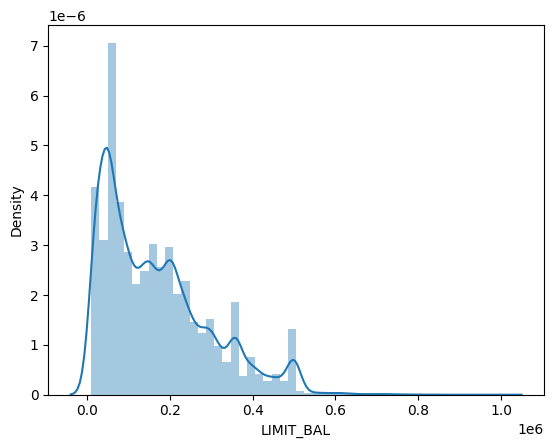


Column :-  AGE


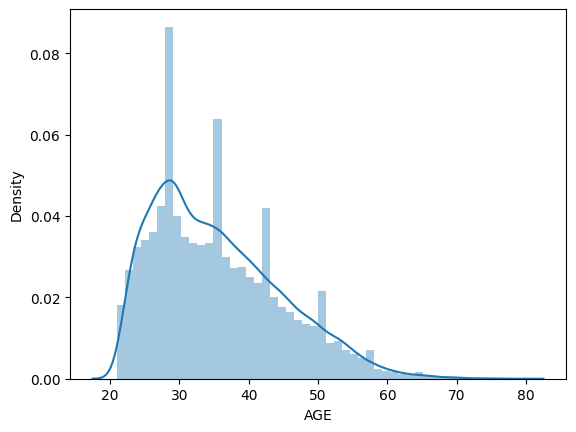


Column :-  PAY_0


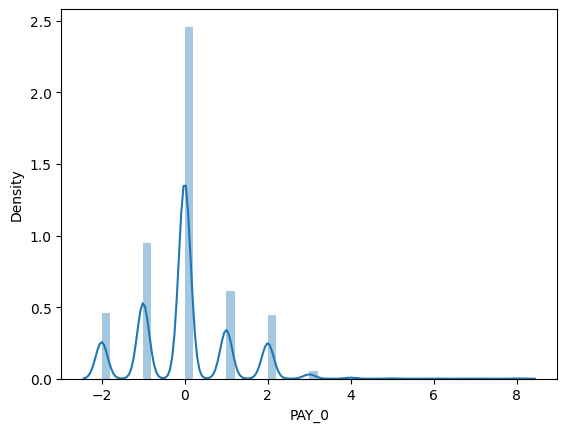


Column :-  PAY_2


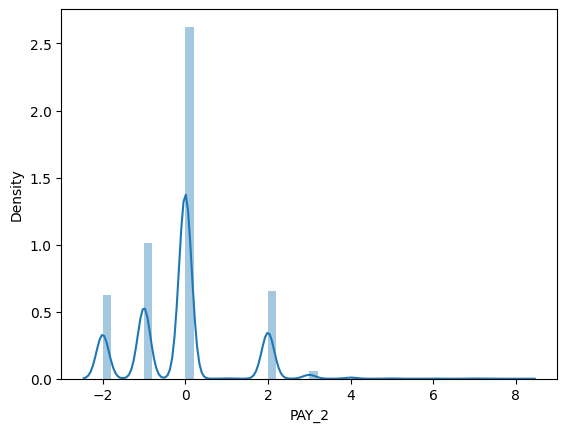


Column :-  PAY_3


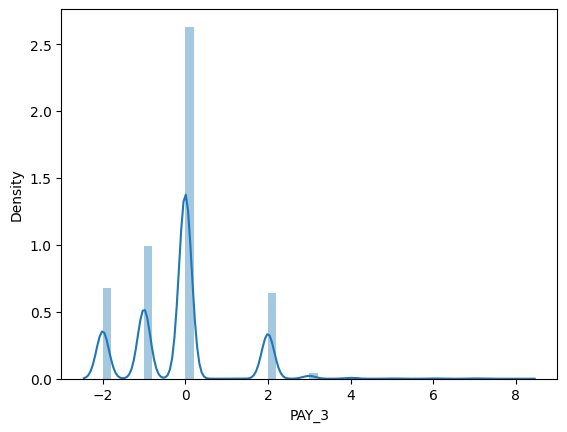


Column :-  PAY_4


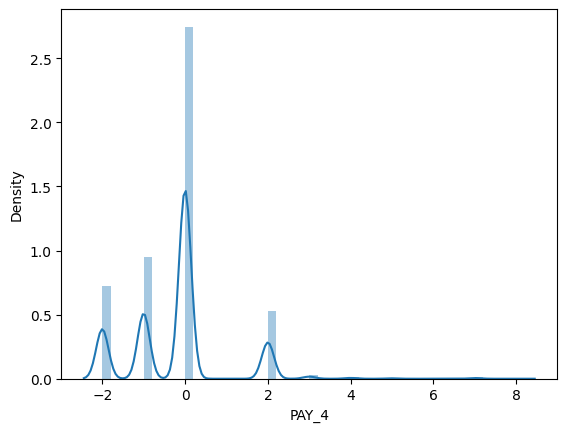


Column :-  PAY_5


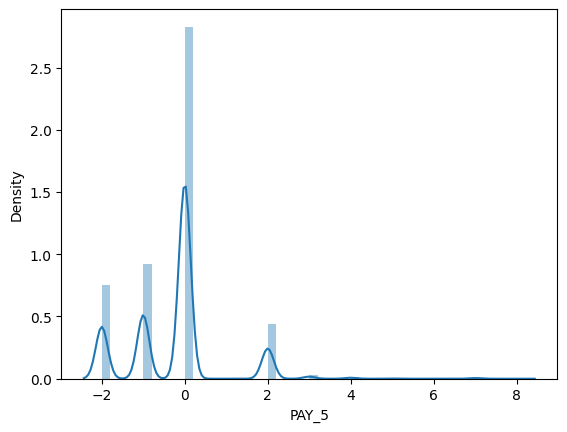


Column :-  PAY_6


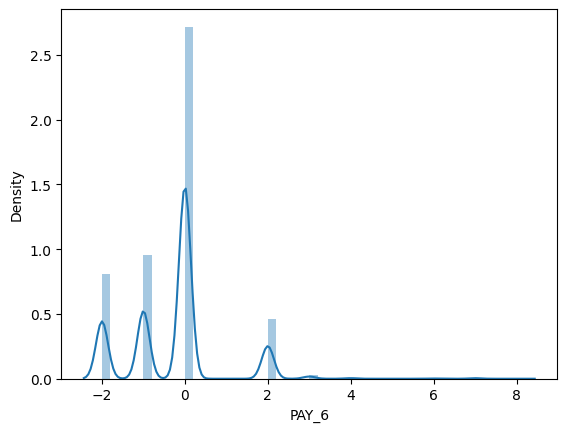


Column :-  BILL_AMT1


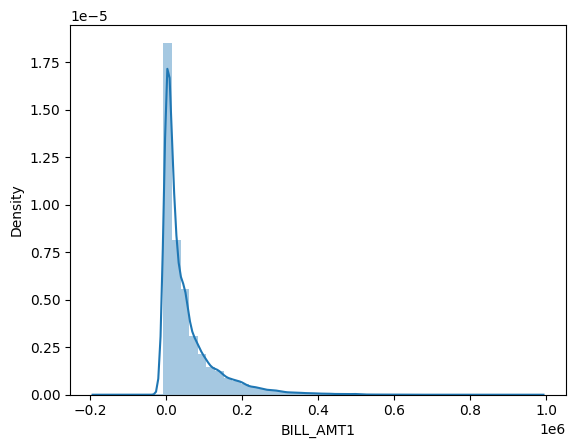


Column :-  BILL_AMT2


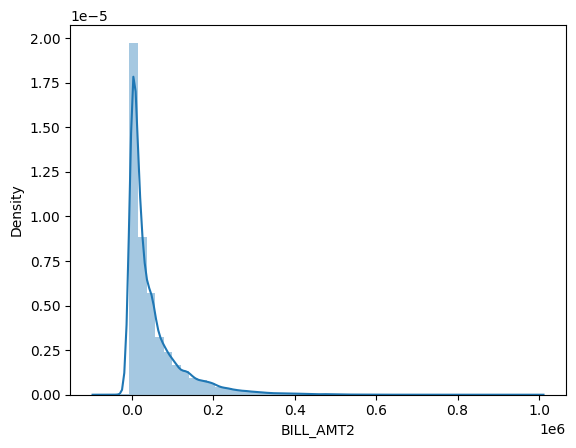


Column :-  BILL_AMT3


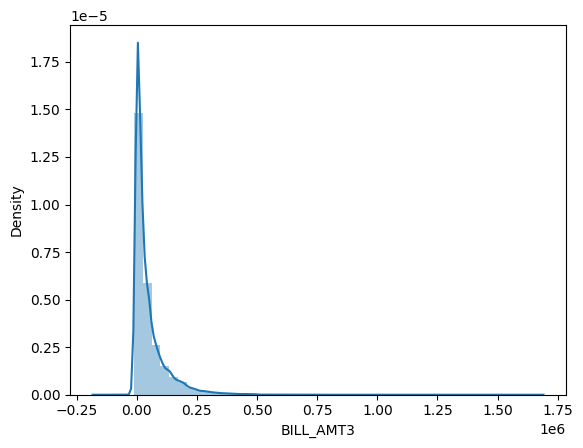


Column :-  BILL_AMT4


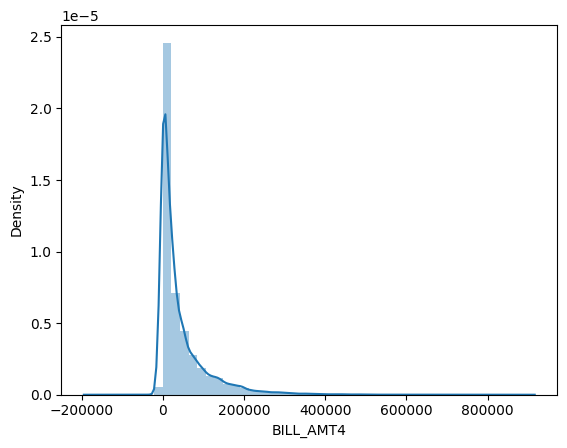


Column :-  BILL_AMT5


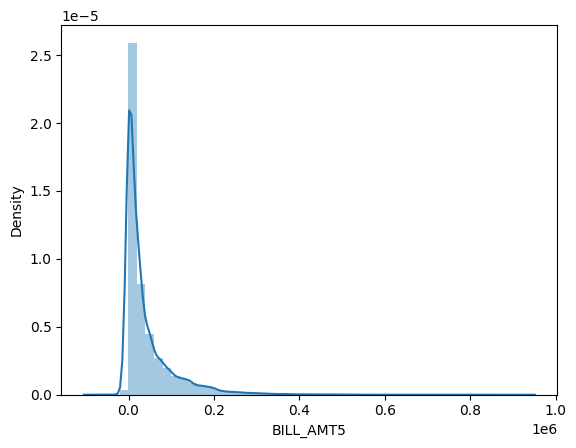


Column :-  BILL_AMT6


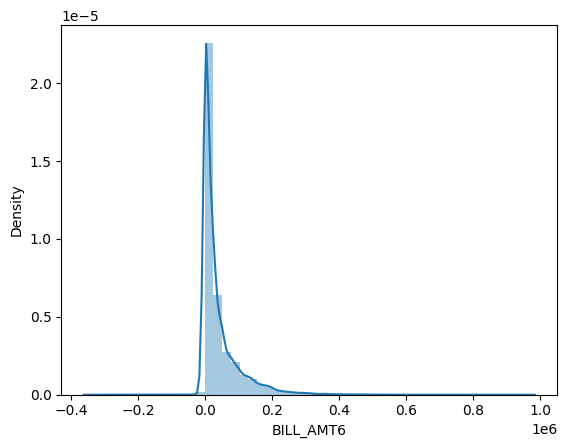


Column :-  PAY_AMT1


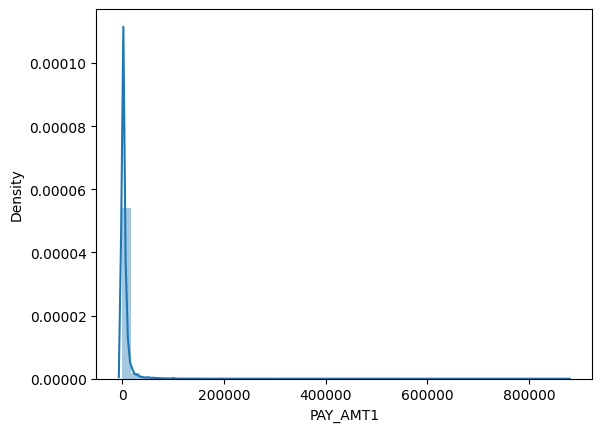


Column :-  PAY_AMT2


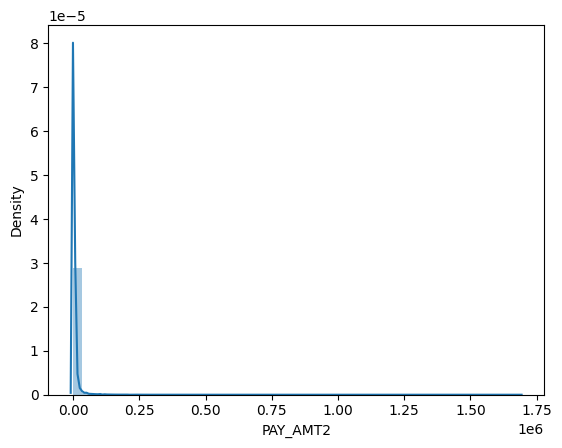


Column :-  PAY_AMT3


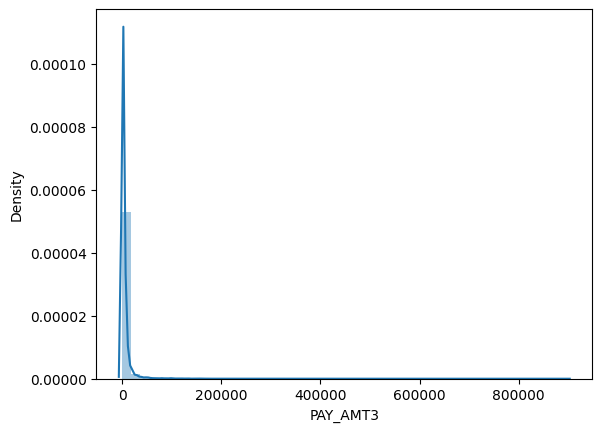


Column :-  PAY_AMT4


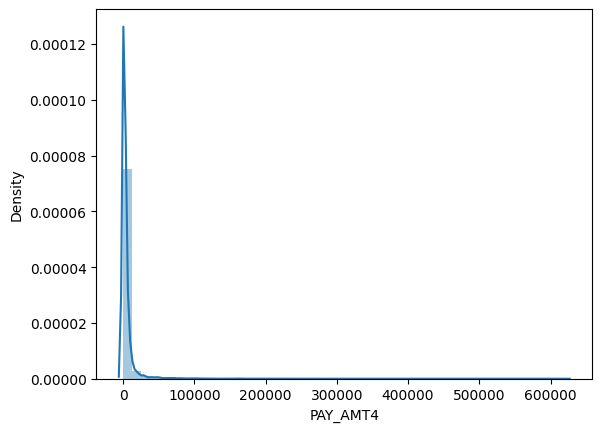


Column :-  PAY_AMT5


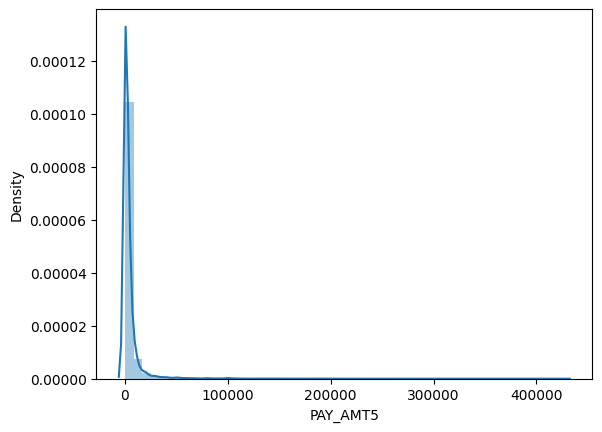


Column :-  PAY_AMT6


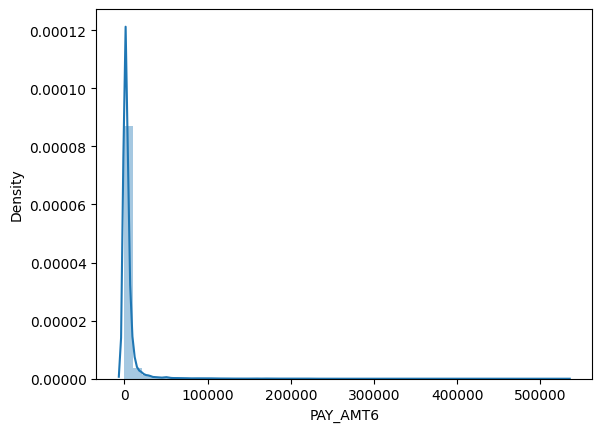

In [28]:
for j in num_var:
    print('Column :- ',j)
    sb.distplot(df[j])
    mpl.show()
    print('')

In [29]:
# for k in num_var:
#     for l in num_var:
#       if k!=l:
#         print(f'Columns :- {k} and {l}')
#         sb.scatterplot(x = k,y = l,data = df)
#         mpl.show()
#         print('')

Text(0.5, 1.0, 'Correlation Plot')

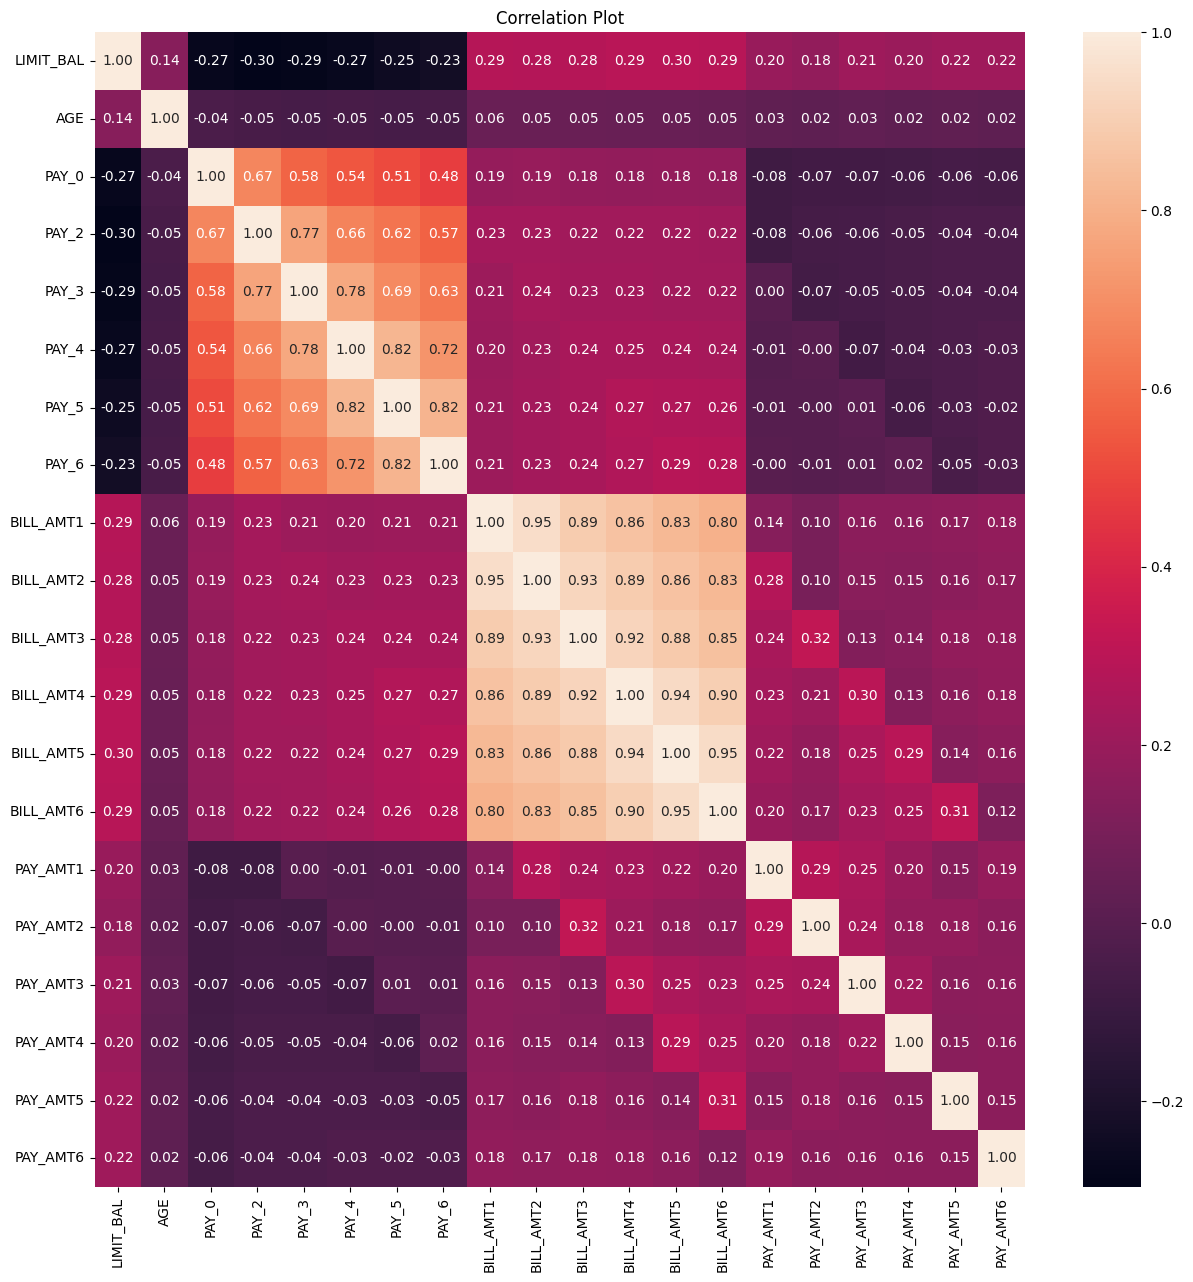

In [30]:
mpl.figure(figsize = (15,15))
sb.heatmap(df.corr(),annot = True,fmt = '.2f')
mpl.title('Correlation Plot')

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('default',axis = 1)
y = df['default']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.3)
X_train.shape,X_test.shape

((20975, 23), (8990, 23))

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [33]:
transformer = ColumnTransformer(transformers = [
    ('c1',OneHotEncoder(drop='first'),['SEX']),
    ('c2',OneHotEncoder(drop='first'),['MARRIAGE']),
    ('c3',OrdinalEncoder(categories = [['Unknown','Others','High School','Graduate school',
                                        'University']]),['EDUCATION']),
],remainder = 'passthrough')

In [34]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [35]:
df['MARRIAGE'].value_counts()

Single     15945
Married    13643
Other        377
Name: MARRIAGE, dtype: int64

In [36]:
X_train_transform = transformer.fit_transform(X_train)
X_test_transform = transformer.transform(X_test)

In [37]:
X_train_transform.shape

(20975, 24)

In [38]:
X_train_new = pd.DataFrame(X_train_transform,columns = ['SEX','MAR_Other','MAR_Single','EDUCATION','LIMIT_BAL',
                                                        'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
X_test_new = pd.DataFrame(X_test_transform,columns = ['SEX','MAR_Other','MAR_Single','EDUCATION','LIMIT_BAL',
                                                        'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [39]:
X_train_new.head(4)

,SEX,MAR_Other,MAR_Single,EDUCATION,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.0,0.0,0.0,4.0,80000.0,39.0,2.0,2.0,2.0,2.0,2.0,2.0,51193.0,50954.0,55132.0,56629.0,57405.0,58742.0,1200.0,5000.0,3000.0,2300.0,2400.0,0.0
1,0.0,0.0,0.0,3.0,50000.0,25.0,0.0,0.0,0.0,0.0,0.0,-2.0,48294.0,48993.0,50702.0,49663.0,0.0,0.0,1805.0,2514.0,2475.0,0.0,0.0,0.0
2,1.0,0.0,0.0,4.0,20000.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,14447.0,15455.0,17562.0,17322.0,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0
3,1.0,0.0,0.0,3.0,500000.0,41.0,0.0,0.0,2.0,2.0,-1.0,2.0,62289.0,63485.0,2015.0,-121.0,679.0,529.0,2608.0,0.0,0.0,800.0,0.0,1500.0


In [40]:
X_train_new.shape

(20975, 24)

In [41]:
le = LabelEncoder()
y_train_new = le.fit_transform(y_train)
y_test_new = le.fit_transform(y_test)

In [42]:
y_train_new = pd.DataFrame(y_train_new,columns = ['default'])
y_test_new = pd.DataFrame(y_test_new,columns = ['default'])

In [43]:
from imblearn.combine import SMOTETomek
samp = SMOTETomek()
X_train_samp,y_train_samp = samp.fit_resample(X_train_new,y_train_new)

In [44]:
y_train_samp.value_counts()

default
0          15884
1          15884
dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scl = ss.fit_transform(X_train_samp)
X_test_scl = ss.transform(X_test_new)

In [46]:
X_train_scl

array([[ 1.27575954, -0.12257103, -1.11203162, ..., -0.13919226,
        -0.12708323, -0.29193274],
       [-0.88535103, -0.12257103, -1.11203162, ..., -0.31085137,
        -0.3081737 , -0.29193274],
       [ 1.27575954, -0.12257103, -1.11203162, ..., -0.26562293,
        -0.27044652, -0.22493302],
       ...,
       [ 1.27575954, -0.12257103,  1.01967475, ..., -0.30610972,
         0.01499452, -0.29193274],
       [-0.88535103, -0.12257103, -0.33670035, ..., -0.20907141,
        -0.2807299 , -0.18488512],
       [-0.88535103, -0.12257103,  0.84961987, ..., -0.08962199,
        -0.12250435, -0.11134134]])

## **PCA**

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train1 = pca.fit_transform(X_train_scl)
X_test1 = pca.transform(X_test_scl)

In [48]:
X_train2 = pd.DataFrame(X_train1,columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10',])
X_test2 = pd.DataFrame(X_test1,columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10',])

In [49]:
X_train2.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,2.103609,-3.297693,1.059592,0.449598,-0.314700,1.514688,-0.109668,0.249654,0.048604,0.243060
1,-0.927331,-0.049556,-0.140859,-0.719733,0.793785,-0.666637,-0.161197,0.236017,0.129473,0.075073
2,-1.033542,-0.953102,-0.237335,-0.166592,-0.261696,1.411432,0.479450,0.108272,0.261508,0.289617
3,0.058275,-0.858212,1.701048,0.535049,-0.931428,0.672273,-0.762985,-0.231921,0.272422,0.053628
4,1.861829,3.941324,0.328257,5.737608,0.757424,-0.663303,-0.537347,-2.330587,-0.940536,4.732057


Text(0.5, 1.0, 'Correlation Plot')

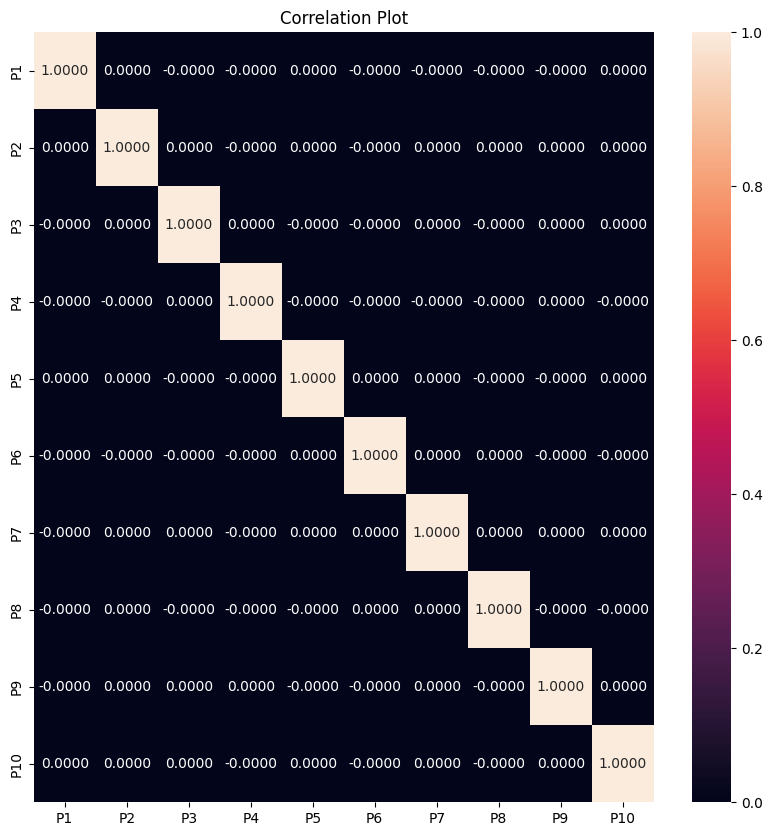

In [50]:
mpl.figure(figsize = (10,10))
sb.heatmap(X_train2.corr(),annot = True,fmt = '.4f')
mpl.title('Correlation Plot')

## **LOGISTIC REGRESSION**

In [51]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor_model = lor.fit(X_train_scl,y_train_samp)
lor_model

LogisticRegression()

In [52]:
lor_y_pred = lor_model.predict(X_test_scl)
lor_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_new,lor_y_pred)

0.696440489432703

In [54]:
def CM(actual,pred):
  cm = sb.heatmap(confusion_matrix(actual,pred),annot = True,fmt = '.2f',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
  mpl.xlabel("Predicted")
  mpl.ylabel("Actual")
  mpl.title('Confusion Matrix')
  mpl.show()
  return cm

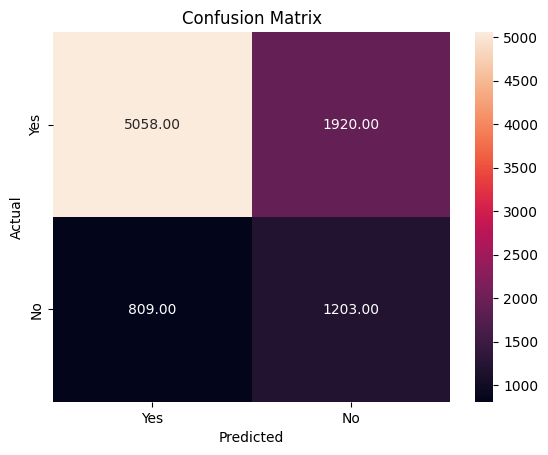

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [55]:
CM(y_test_new,lor_y_pred)

## **LOGISTIC REGRESSION WITH SGD**






In [56]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty="l1")
sgd_model = sgd.fit(X_train_scl,y_train_samp)
sgd_model

SGDClassifier(penalty='l1')

In [57]:
sgd_y_pred = sgd_model.predict(X_test_scl)
sgd_y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [58]:
accuracy_score(y_test_new,sgd_y_pred)

0.7482758620689656

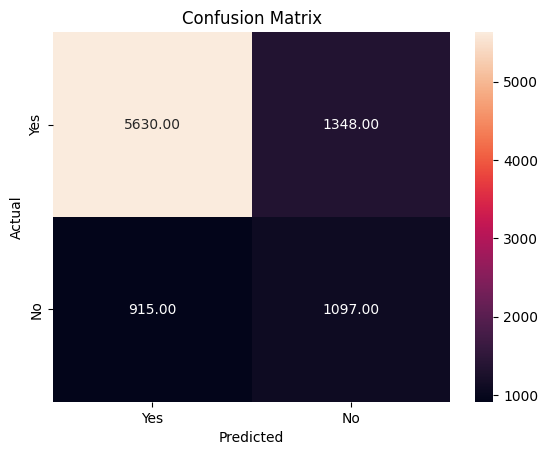

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [59]:
CM(y_test_new,sgd_y_pred)

## **DECISION TREE**

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth=5,min_samples_split=20)
dt_model = dt.fit(X_train_scl,y_train_samp)
dt_model

DecisionTreeClassifier(max_depth=5, min_samples_split=20)

In [61]:
dt_y_pred = dt_model.predict(X_test_scl)
dt_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
accuracy_score(y_test_new,dt_y_pred)

0.77853170189099

In [63]:
from sklearn.model_selection import RandomizedSearchCV
dt_param = [{'criterion':['gini','entropy'],'min_samples_split':range(10,30),'max_depth':range(3,10)}]
rs = RandomizedSearchCV(DecisionTreeClassifier(),dt_param,cv = 10,scoring = 'accuracy')
rs.fit(X_train2,y_train_samp)

In [64]:
rs.best_params_

In [65]:
rs.best_score_

# **RANDOM FOREST**

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy',max_depth = 7 , min_samples_split = 20,n_estimators = 200)
rf_model = rf.fit(X_train_scl,y_train_samp)
rf_model

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=20,
                       n_estimators=200)

In [67]:
rf_y_pred = rf_model.predict(X_test_scl)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
accuracy_score(y_test_new,rf_y_pred)

0.8051167964404894

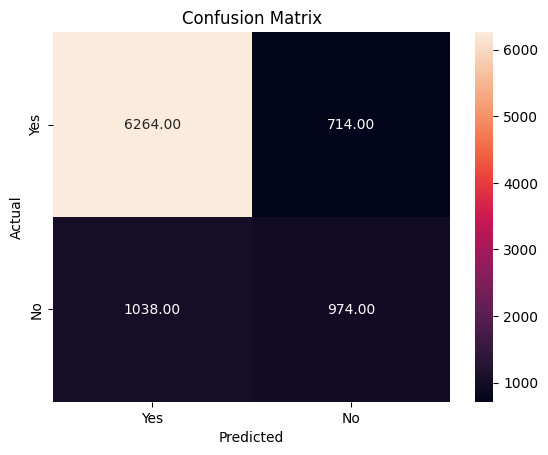

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [69]:
CM(y_test_new,rf_y_pred)

In [70]:
from sklearn.model_selection import GridSearchCV
tunning_param = [{'criterion':['gini','entropy'],"n_estimators":[100,200,300],
                  "min_samples_split":[10,20,30],"max_depth":range(3,5)}]
gs_rf = GridSearchCV(RandomForestClassifier(),tunning_param,cv = 10,scoring = 'accuracy')
gs_rf.fit(X_train2,y_train_samp)

In [71]:
gs_rf.best_params_

In [72]:
gs_rf.best_score_

In [73]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),tunning_param,cv = 10,scoring = 'accuracy')
rs_rf.fit(X_train_scl,y_train_samp)

In [74]:
rs.best_params_

In [75]:
rs.best_score_

## **ADABOOST CLASSIFIER**

In [76]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc_model = abc.fit(X_train_scl,y_train_samp)
abc_model

AdaBoostClassifier(n_estimators=100)

In [77]:
abc_y_pred = abc_model.predict(X_test_scl)
abc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
accuracy_score(y_test_new,abc_y_pred)

0.8151279199110122

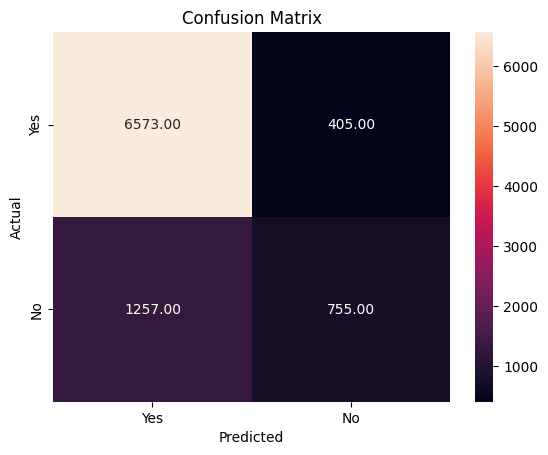

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [79]:
CM(y_test_new,abc_y_pred)

## **GRADIENTBOOST CLASSIFIER**

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(X_train_scl,y_train_samp)
gbc_model

GradientBoostingClassifier()

In [81]:
gbc_y_pred = gbc_model.predict(X_test_scl)
gbc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
accuracy_score(y_test_new,gbc_y_pred)

0.8206896551724138

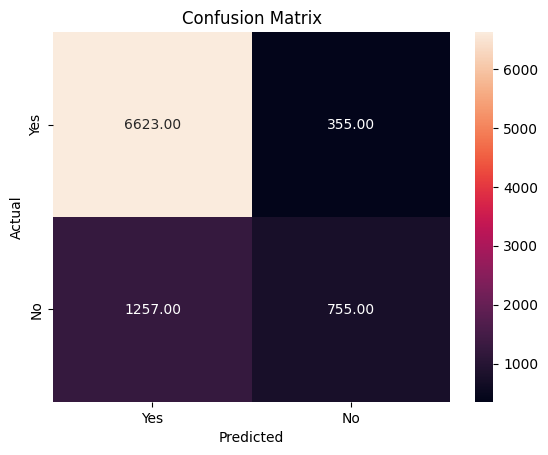

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [83]:
CM(y_test_new,gbc_y_pred)

## **XGBOOST**

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train_scl,y_train_samp)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
xgb_y_pred = xgb_model.predict(X_test_scl)
xgb_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
accuracy_score(y_test_new,xgb_y_pred)

0.8121245828698554

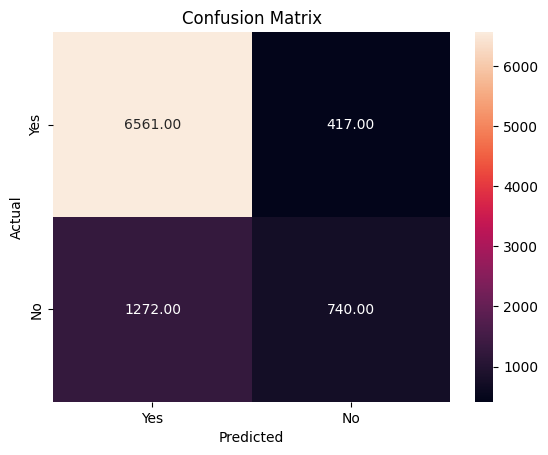

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [87]:
CM(y_test_new,xgb_y_pred)

## **NEURAL NETWORK**

In [88]:
import tensorflow
from tensorflow import keras
from keras import Sequential,regularizers
from keras.layers import *
from keras.callbacks import EarlyStopping

In [173]:
Callback = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    min_delta=0.0001,
    mode = "auto"
)

In [174]:
model = Sequential()

In [175]:
model.add(Dense(32,activation = "relu",input_dim = 24,kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.001)))
model.add(BatchNormalization())
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.001)))
model.add(BatchNormalization())
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.001)))
model.add(BatchNormalization())
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.001)))
model.add(BatchNormalization())
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [176]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 32)                800       
                                                                 
 batch_normalization_39 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_78 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_40 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_79 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_41 (Bat  (None, 32)              

In [177]:
model.weights[0]

<tf.Variable 'dense_77/kernel:0' shape=(24, 32) dtype=float32, numpy=
array([[-4.52001840e-02, -5.27768493e-01, -1.17913578e-02,
        -7.54352137e-02, -3.67221743e-01,  2.00592324e-01,
         5.71955815e-02,  1.57268092e-01, -4.22340572e-01,
         5.00473142e-01,  1.72662929e-01,  2.38636136e-01,
         3.76765579e-02, -2.64809113e-02,  2.56967582e-02,
        -3.94098163e-01,  5.20018578e-01, -1.26065105e-01,
         4.55179691e-01,  3.46225172e-01, -2.11682171e-01,
         8.89207199e-02,  3.88141036e-01, -4.90353703e-01,
         3.72896403e-01,  4.70376998e-01,  4.75082278e-01,
        -5.73452234e-01, -2.68515855e-01, -1.21705264e-01,
         1.22245960e-01, -3.37256044e-01],
       [-2.45264426e-01,  8.78365785e-02,  3.94204021e-01,
        -3.06515008e-01, -1.55885428e-01,  3.93006653e-02,
        -3.71902019e-01, -5.27917624e-01,  1.06284127e-01,
        -5.55772841e-01,  1.26683742e-01, -7.17216134e-02,
        -7.72266649e-03,  2.52363682e-02, -3.83876488e-02,
  

In [178]:
model.compile(optimizer = "Adam",loss = 'binary_crossentropy',metrics = 'accuracy',)

In [179]:
history = model.fit(X_train_scl,y_train_samp,epochs = 1000,validation_data = (X_test_scl,y_test_new),callbacks=Callback,batch_size=32)

Epoch 1/1000
993/993 [==============================] - 12s 8ms/step - loss: 1.4142 - accuracy: 0.6906 - val_loss: 1.2027 - val_accuracy: 0.7590
Epoch 2/1000
993/993 [==============================] - 8s 8ms/step - loss: 1.0540 - accuracy: 0.7490 - val_loss: 0.9592 - val_accuracy: 0.7499
Epoch 3/1000
993/993 [==============================] - 8s 8ms/step - loss: 0.8263 - accuracy: 0.7702 - val_loss: 0.7827 - val_accuracy: 0.7920
Epoch 4/1000
993/993 [==============================] - 8s 8ms/step - loss: 0.6909 - accuracy: 0.7854 - val_loss: 0.6899 - val_accuracy: 0.7893
Epoch 5/1000
993/993 [==============================] - 8s 8ms/step - loss: 0.6098 - accuracy: 0.7950 - val_loss: 0.6737 - val_accuracy: 0.7904
Epoch 6/1000
993/993 [==============================] - 8s 8ms/step - loss: 0.5612 - accuracy: 0.7989 - val_loss: 0.5946 - val_accuracy: 0.7959
Epoch 7/1000
993/993 [==============================] - 8s 8ms/step - loss: 0.5299 - accuracy: 0.8036 - val_loss: 0.5625 - val_accuracy

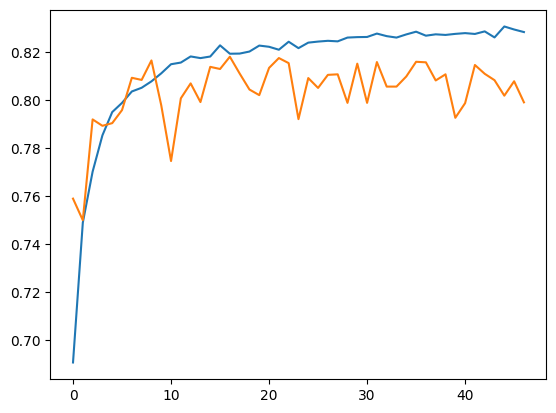

In [180]:
mpl.plot(history.history['accuracy'])
mpl.plot(history.history['val_accuracy'])

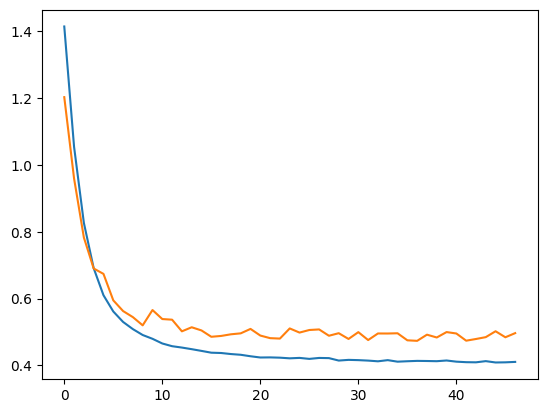

In [181]:
mpl.plot(history.history['loss'])
mpl.plot(history.history['val_loss'])